![Задача](task.png)

### Приведем уравнения к виду:

Для всех уравнений справедлива общая форма:
$$
a_n y_{n-1} + b_n y_n + c_n y_{n+1} = d_n,
$$
где коэффициенты определяются следующим образом:

- Для $ n = 0 $:
$$
a_0 = \frac{1}{h^2}, \quad b_0 = -\frac{2}{h^2} - P^2(0), \quad c_0 = \frac{1}{h^2}, \quad d_0 = -f(0).
$$

- Для $ n = 1, 2, \ldots, N-2 $:
$$
a_n = \frac{1}{h^2}, \quad b_n = -\frac{2}{h^2} - P^2(nh), \quad c_n = \frac{1}{h^2}, \quad d_n = -f(nh).
$$

- Для $ n = N-1 $:
$$
a_{N-1} = \frac{1}{h^2}, \quad b_{N-1} = -\frac{2}{h^2} - P^2(1-h), \quad c_{N-1} = \frac{1}{h^2}, \quad d_{N-1} = -f(1-h).
$$

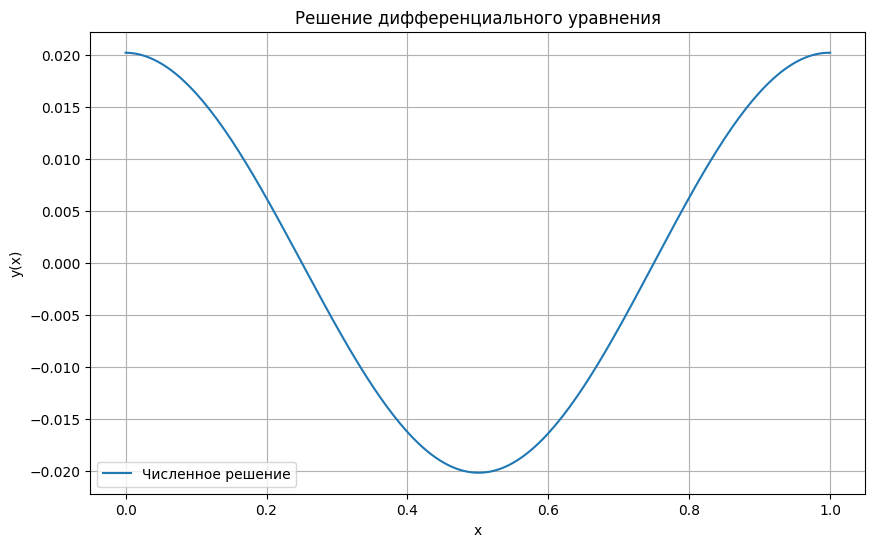

In [5]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.005
N = int(1 / h)
x = np.linspace(0, 1, N, endpoint=False)

def P2(x):
    return 10 + np.sin(2 * np.pi * x)

def f(x):
    return np.cos(2 * np.pi * x)

a = np.full(N, 1 / h**2)
b = -2 / h**2 - P2(x)
c = np.full(N, 1 / h**2)
d = -f(x)

A = np.zeros((N, N))

for i in range(N):
    A[i, i] = b[i]
    if i > 0:
        A[i, i - 1] = a[i]
    else:
        A[i, N - 1] = a[i]  
    if i < N - 1:
        A[i, i + 1] = c[i]
    else:
        A[i, 0] = c[i]  

y = np.linalg.solve(A, d)

x_full = np.append(x, 1)
y_full = np.append(y, y[0])

plt.figure(figsize=(10, 6))
plt.plot(x_full, y_full, label='Численное решение')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решение дифференциального уравнения')
plt.grid(True)
plt.legend()
plt.show()